### 한글 깨짐 방지

In [66]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'Malgun Gothic'

# 분석 시작

우선, 최종 데이터셋 자세히 확인. Null 값은 없는지 불러오면서 오류는 없는지 등

In [67]:
# 필요 라이브러리 불러오기
import pandas as pd

# CSV 파일 불러오기
file_path = "최종데이터셋.csv"  # 업로드한 파일 경로
df = pd.read_csv(file_path)

# 데이터 확인
print("📌 데이터 프레임 기본 정보")
df.info()

# 상위 5개 행 출력
df.head()

📌 데이터 프레임 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구               426 non-null    object 
 1   행정기관코드          426 non-null    int64  
 2   읍면동명            426 non-null    object 
 3   인구수             426 non-null    int64  
 4   지하철역개수          426 non-null    int64  
 5   공원개수            426 non-null    int64  
 6   대형마트개수          426 non-null    int64  
 7   어린이집개수          426 non-null    int64  
 8   야간운영어린이집개수      426 non-null    int64  
 9   고등학교개수          426 non-null    int64  
 10  중학교개수           426 non-null    int64  
 11  초등학교개수          426 non-null    int64  
 12  파출소개수           426 non-null    int64  
 13  치안센터개수          426 non-null    int64  
 14  주택전세가격          426 non-null    float64
 15  CCTV개수          426 non-null    int64  
 16  안전센터및구조대개수      426 non-null    int64  
 17  문화시설개수          426

,구,행정기관코드,읍면동명,인구수,지하철역개수,공원개수,대형마트개수,어린이집개수,야간운영어린이집개수,고등학교개수,...,초미세먼지(PM25) 평균,녹지면적,영화관개수,유원시설개수,14세미만아동,아동비율,산후조리원개수,2021~2023혼인,20~40남자수,20~40여자수
0,종로구,1111051500,청운효자동,11040,0,2,0,4,4,4,...,18.98,228451,0,2,1024,0.092754,0,103,1397,1575
1,종로구,1111053000,사직동,8939,1,3,1,11,4,0,...,18.98,228451,2,1,728,0.081441,0,122,1115,1479
2,종로구,1111054000,삼청동,2214,1,1,0,2,1,1,...,18.98,228451,0,0,149,0.067299,0,29,260,288
3,종로구,1111055000,부암동,9028,0,0,0,1,1,1,...,18.98,228451,0,0,737,0.081635,0,86,1148,1192
4,종로구,1111056000,평창동,17232,0,0,0,3,3,1,...,18.98,228451,0,0,1683,0.097667,0,132,1991,2156


Null 값 없고, 426개의 행정동 모두 잘 나타나는 것 확인함.

## 간단한 수치형 데이터 확인
- '읍면동명' 칼럼을 label로 함.
- '구', '행정기관코드' 칼럼은 제외함. (의미 없고, 숫자형 데이터가 아님.)

### 가장 먼저 상관관계 분석 먼저 진행

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

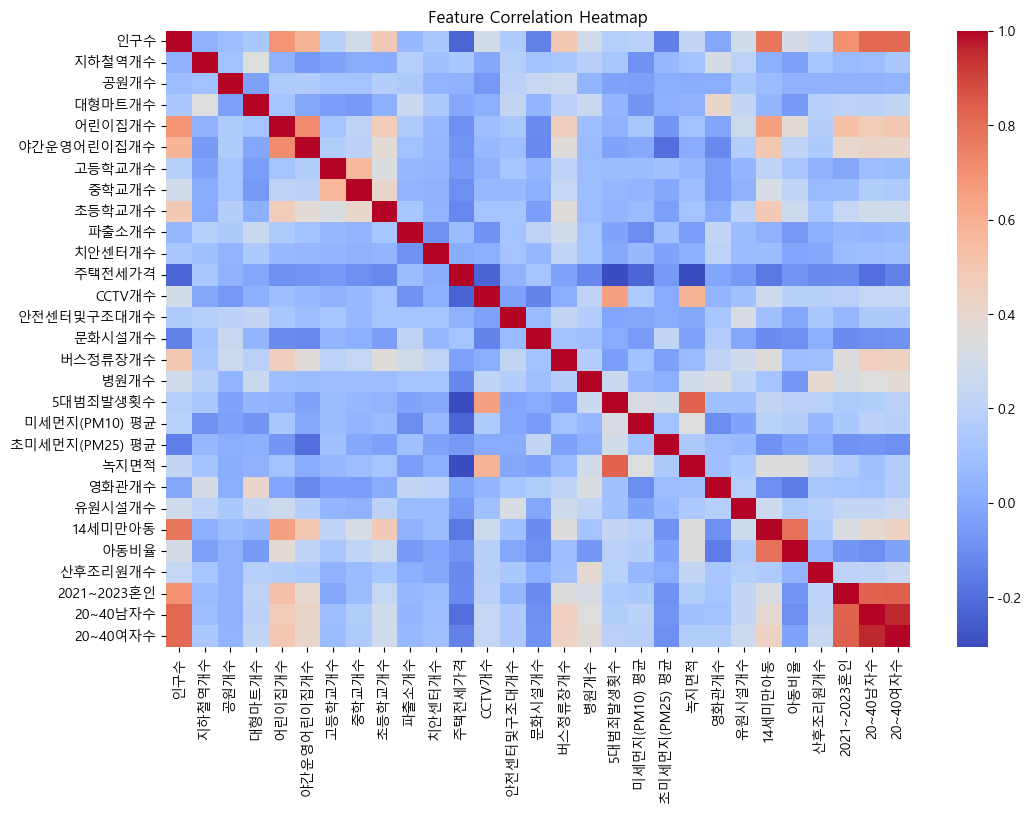

In [69]:
# CSV 파일 불러오기
file_path = "최종데이터셋.csv"
df = pd.read_csv(file_path)

# '구', '행정기관코드', '읍면동명' 제거 후 수치형 데이터만 선택
df_numeric = df.drop(columns=['구', '행정기관코드', '읍면동명']).select_dtypes(include=[np.number])

# 히트맵 그리기 (숫자 표시 X)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

서로 관계가 있는 칼럼을 추가하지 않았기에,
1. 인구에 대한 데이터
2. 혼인 수와 20 ~ 40대 남성, 여성 수   
   
이런 애들을 제외하고는 크게 상관 관계 발견 못 함.   
조금 신기한 것은 14세 미안 아동 비율과 어린이집 개수가 상관관계가 어느정도 있는 것으로 확인됨.

### 약간의 데이터 수정

- 파출소와 치안센터 데이터를 합쳐볼 것임.
- 문화시설에 영화관도 포함되기에 문화시설과 영화관 데이터도 합칠 것임.
- 중학교와 고등학교 또한 상급 학교로 합칠 것임.

In [70]:
file_path = '최종데이터셋.csv'

df = pd.read_csv(file_path, encoding='utf-8')

df['총 치안시설 수'] = df['파출소개수'] + df['치안센터개수']
df['총 문화시설 수'] = df['문화시설개수'] + df['영화관개수']
df['총 상급학교 수'] = df['고등학교개수'] + df['중학교개수']

df = df.drop(['파출소개수', '치안센터개수', '문화시설개수', '영화관개수', '중학교개수', '고등학교개수'], axis=1)

df.to_csv('최종데이터셋_합산.csv', encoding='utf-8', index=False)

### 수정된 데이터를 바탕으로 다시 상관관계 살펴보기
- 주택전세가격 같은 경우 위에서 상관관계가 크게 눈에 띄지 않았기에 제외하겠음.|

In [71]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# CSV 파일 불러오기
file_path = "최종데이터셋_합산.csv"
df = pd.read_csv(file_path)

# '구', '행정기관코드', '읍면동명' 제거 후 수치형 데이터만 선택
df_numeric_ = df.drop(columns=['구', '행정기관코드', '읍면동명', '주택전세가격']).select_dtypes(include=[np.number])

# 독립 변수 행렬 X 준비
X = df_numeric_
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["변수"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력 (내림차순 정렬)
print(vif.sort_values(by="VIF", ascending=False))


                변수          VIF
0            const  1269.044126
17         14세미만아동    20.885148
21        20~40남자수    20.353412
1              인구수    18.917881
22        20~40여자수    15.207809
18            아동비율     8.033022
12        5대범죄발생횟수     5.214592
15            녹지면적     4.714156
20     2021~2023혼인     4.586445
5           어린이집개수     3.820402
6       야간운영어린이집개수     2.498847
8           CCTV개수     2.132114
10         버스정류장개수     1.993385
7           초등학교개수     1.657632
11            병원개수     1.541207
4           대형마트개수     1.413989
23        총 치안시설 수     1.413132
14  초미세먼지(PM25) 평균     1.383723
13   미세먼지(PM10) 평균     1.366593
16          유원시설개수     1.348769
25        총 상급학교 수     1.332505
19         산후조리원개수     1.294341
2           지하철역개수     1.288108
24        총 문화시설 수     1.284790
9       안전센터및구조대개수     1.262979
3             공원개수     1.231851


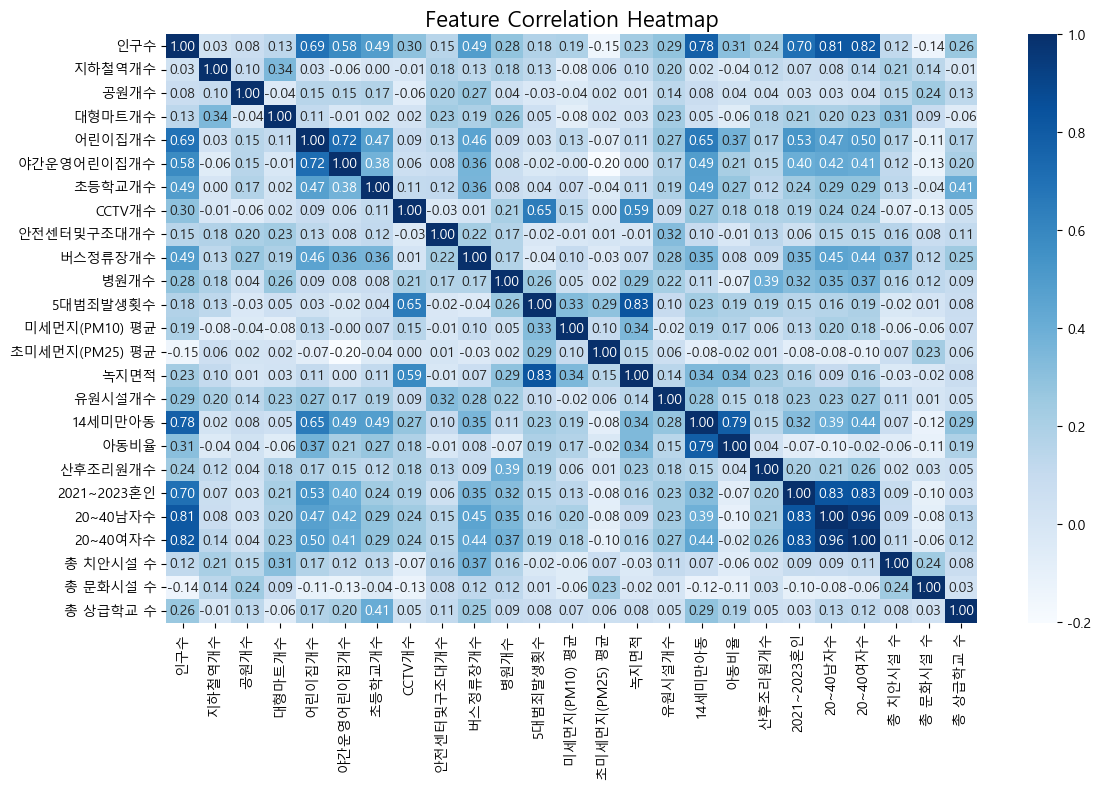

In [72]:
# CSV 파일 불러오기
file_path = "최종데이터셋_합산.csv"
df = pd.read_csv(file_path)

# '구', '행정기관코드', '읍면동명' 제거 후 수치형 데이터만 선택
df_numeric_ = df.drop(columns=['구', '행정기관코드', '읍면동명','주택전세가격']).select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_.corr(), cmap="Blues", cbar=True, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [73]:
# 상관관계 행렬 계산
correlation_matrix = df_numeric_.corr()

# 상관관계가 0.5 이상인 변수 쌍 찾기
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.7]

# 대각선 위쪽 부분만 선택 (중복 제거)
high_correlation = high_correlation.where(np.triu(np.ones(high_correlation.shape), k=1).astype(bool))

# NaN 값 제거 및 결과 출력
high_correlation = high_correlation.stack().reset_index()
high_correlation = high_correlation.dropna()

print(high_correlation)

       level_0      level_1         0
0          인구수      14세미만아동  0.777762
1          인구수  2021~2023혼인  0.703628
2          인구수     20~40남자수  0.814734
3          인구수     20~40여자수  0.815801
4       어린이집개수   야간운영어린이집개수  0.718358
5     5대범죄발생횟수         녹지면적  0.827889
6      14세미만아동         아동비율  0.787737
7  2021~2023혼인     20~40남자수  0.828588
8  2021~2023혼인     20~40여자수  0.834736
9     20~40남자수     20~40여자수  0.955284


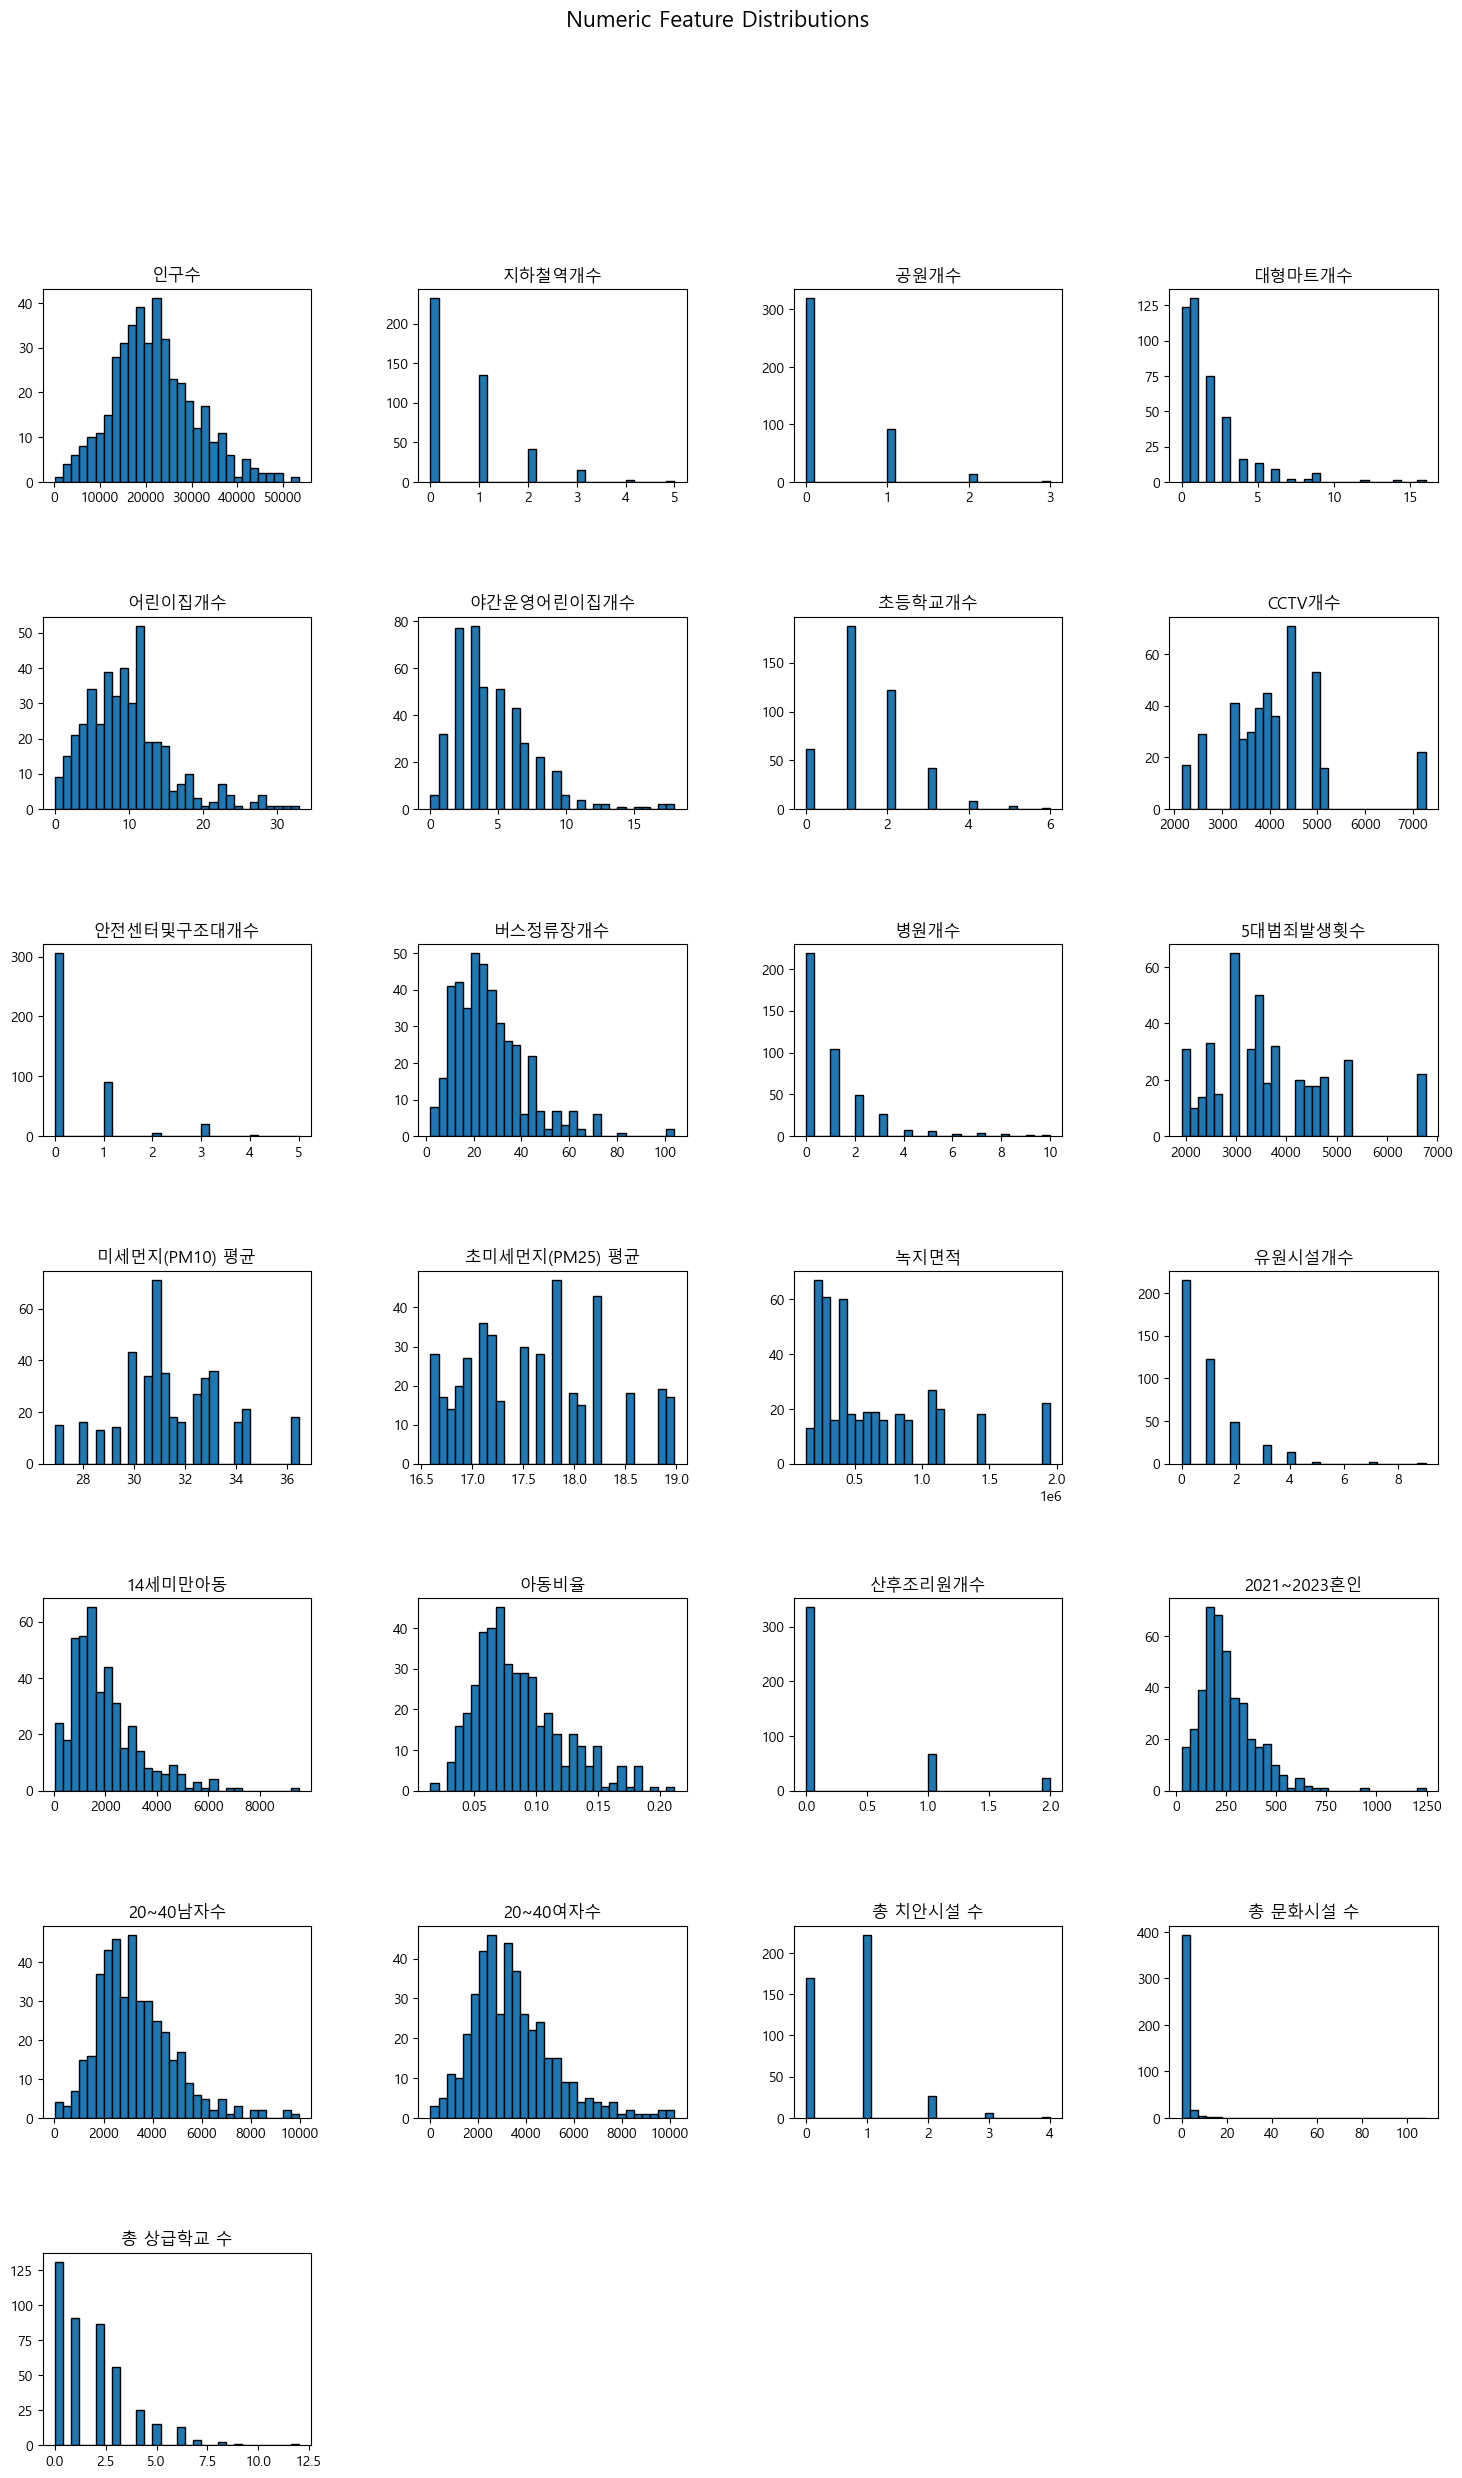

In [74]:
import matplotlib.pyplot as plt

# 히스토그램 (그래프 간격 조정)
num_features = df_numeric_.shape[1]  # 총 수치형 변수 개수
cols = 4  # 한 줄에 표시할 그래프 개수
rows = (num_features // cols) + (num_features % cols > 0)  # 필요한 행 개수 계산

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))  # 동적 크기 조정
axes = axes.flatten()  # 1D 배열로 변환

for i, col in enumerate(df_numeric_.columns):
    ax = axes[i]
    ax.hist(df_numeric_[col], bins=30, edgecolor='k')
    ax.set_title(col)


# 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 그래프 간격 조정
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # 위아래(hspace), 좌우(wspace) 간격 넓히기
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

수치형 데이터들 분포를 확인했더니, 생각보다 정규분포를 따르는 애들이 적은 것을 확인할 수 있음.   
산후조리원 개수 같은 컬럼은 그냥 유 / 무 정도로만 표현하면 될 듯함.   


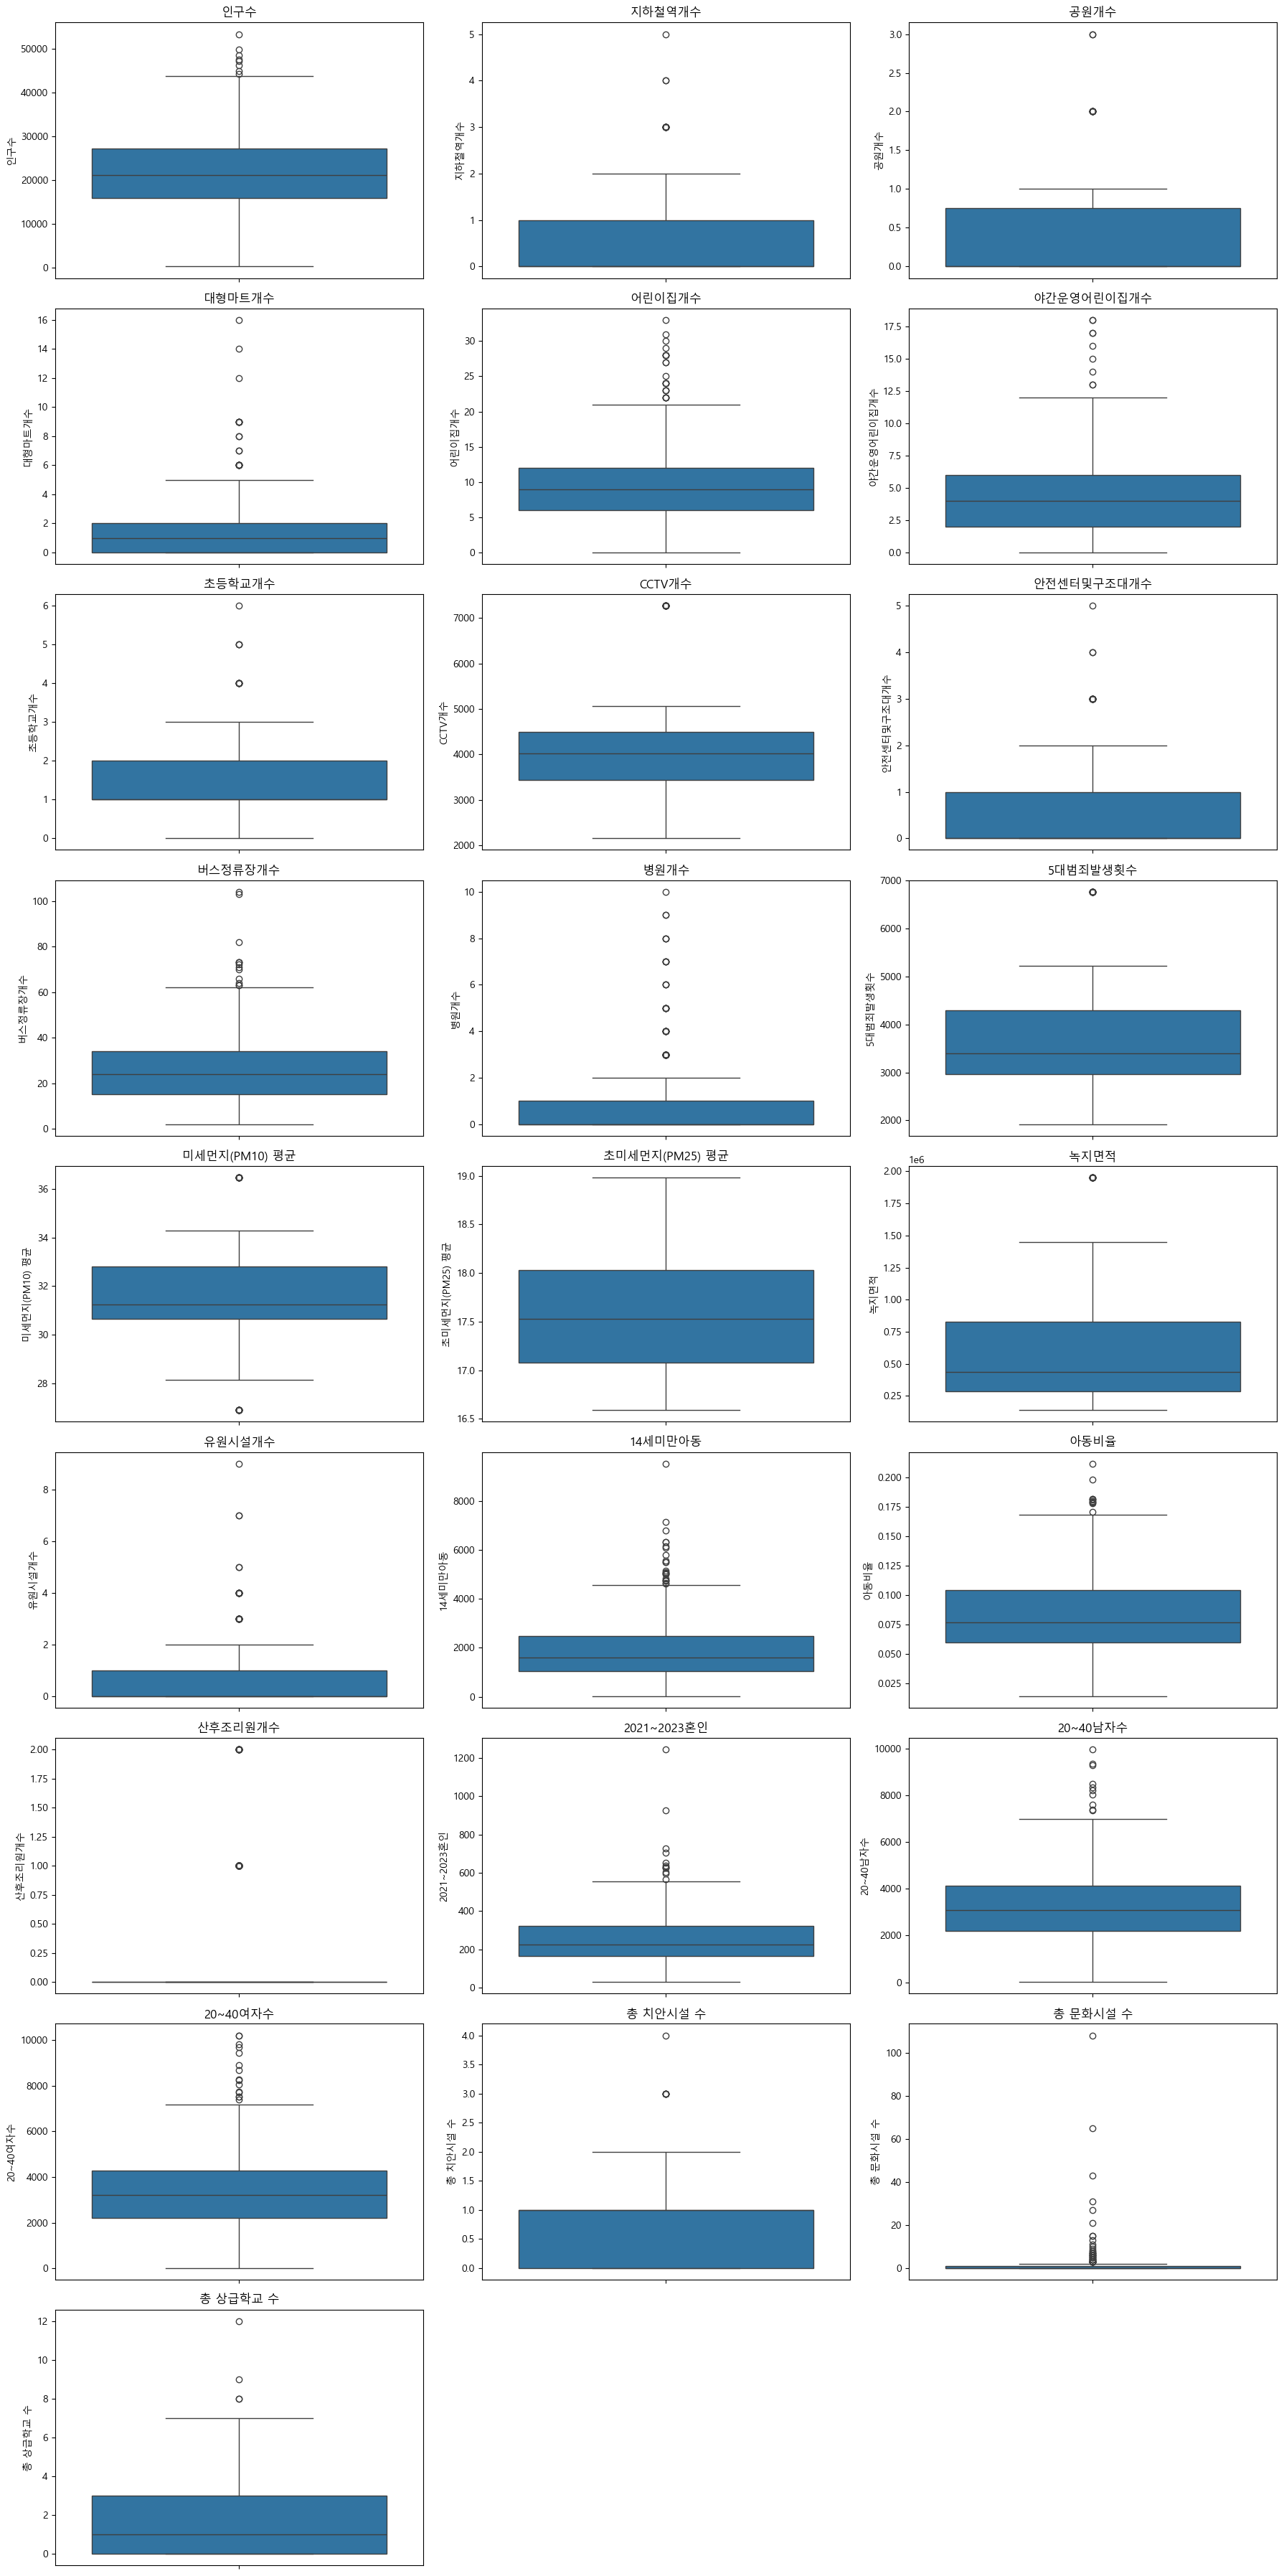

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼별 개별 박스플롯
num_features = df_numeric_.shape[1]  # 수치형 변수 개수
cols = 3  # 한 줄에 표시할 그래프 개수
rows = (num_features // cols) + (num_features % cols > 0)  # 필요한 행 개수 계산

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))  # 크기 조정
axes = axes.flatten()  # 1D 배열로 변환

for i, col in enumerate(df_numeric_.columns):
    sns.boxplot(data=df_numeric_[col], ax=axes[i])
    axes[i].set_title(col)

# 빈 서브플롯 숨기기 (데이터 개수에 맞춰 조정)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 레이아웃 조정
plt.show()

이상치를 확인하기 위해 박스플롯으로 나타내어 봤는데, 생각보다 많이 없는 것 같음. 물론 0개, 1개, 2개 같이 적은 애들은 분포를 그리기 애매하니까, 이상치가 많은 것 처럼 나오지만, 이상치라 보기는 어려울 듯 싶음.

## 몇 가지 모델링 기법 적용

### 1. K means 클러스터링

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_numeric_ = df.drop(columns=['구', '읍면동명', '행정기관코드', 
                               '아동비율','14세미만아동','인구수', 
                               '주택전세가격', '2021~2023혼인', '20~40남자수', 
                               '20~40여자수']).select_dtypes(include=[np.number])

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_)

# K-means 클러스터링 실행
kmeans = KMeans(n_clusters=7, random_state=42)
df_numeric_['Cluster'] = kmeans.fit_predict(df_scaled)

df_numeric_.groupby('Cluster').mean()

,지하철역개수,공원개수,대형마트개수,어린이집개수,야간운영어린이집개수,초등학교개수,CCTV개수,안전센터및구조대개수,버스정류장개수,병원개수,5대범죄발생횟수,미세먼지(PM10) 평균,초미세먼지(PM25) 평균,녹지면적,유원시설개수,산후조리원개수,총 치안시설 수,총 문화시설 수,총 상급학교 수
Cluster,,,,,,,,,,,,,,,,,,,
0,0.607143,0.607143,2.142857,22.857143,10.571429,3.107143,4224.357143,0.571429,51.821429,1.928571,3975.821429,31.818929,17.587857,8.351828e+05,2.250000,0.750000,1.142857,0.750000,3.642857
1,1.000000,0.285714,2.285714,7.095238,2.857143,1.476190,7267.000000,0.333333,23.904762,2.952381,6763.000000,30.930000,18.210000,1.950588e+06,1.333333,0.714286,0.809524,4.095238,2.190476
2,0.603774,0.924528,0.981132,9.754717,4.660377,2.094340,3728.075472,0.320755,29.943396,0.584906,3185.867925,31.439623,17.772453,4.666176e+05,0.339623,0.113208,0.811321,5.056604,3.754717
3,1.400000,0.366667,5.200000,11.133333,4.566667,1.566667,3679.833333,2.066667,38.700000,2.200000,3151.900000,30.927333,17.721667,4.391553e+05,1.966667,0.366667,1.333333,3.733333,1.866667
4,0.561404,0.166667,1.552632,9.017544,4.771930,1.228070,3965.798246,0.289474,25.368421,0.587719,2692.175439,30.172895,16.976930,3.359984e+05,0.675439,0.122807,0.649123,0.684211,1.175439
5,0.343137,0.058824,1.009804,6.558824,2.911765,0.921569,3795.676471,0.107843,17.715686,0.450980,3574.098039,31.579510,18.168137,4.670489e+05,0.509804,0.117647,0.470588,0.647059,1.068627
6,0.820513,0.217949,1.679487,10.294872,4.423077,1.294872,4092.320513,0.397436,24.410256,1.500000,4421.000000,33.478590,17.278974,1.031954e+06,0.948718,0.448718,0.564103,0.897436,1.346154


In [77]:
df['Cluster'] = df_numeric_['Cluster']

# 클러스터별 읍면동명 리스트 확인
cluster_result = df[['읍면동명', 'Cluster']].groupby('Cluster')['읍면동명'].apply(list)

# 출력 확인
for cluster, areas in cluster_result.items():
    print(f"📌 Cluster {cluster}:")
    print(areas[:10])  # 너무 많으면 앞 10개만 출력
    print("-" * 50)

📌 Cluster 0:
['장안2동', '망우본동', '신내1동', '월계3동', '공릉2동', '진관동', '상암동', '신정3동', '염창동', '등촌3동']
--------------------------------------------------
📌 Cluster 1:
['신사동', '논현1동', '논현2동', '압구정동', '청담동', '삼성1동', '삼성2동', '대치1동', '대치2동', '대치4동']
--------------------------------------------------
📌 Cluster 2:
['청운효자동', '사직동', '삼청동', '이화동', '혜화동', '중림동', '용산2가동', '청파동', '광장동', '전농2동']
--------------------------------------------------
📌 Cluster 3:
['종로1.2.3.4가동', '회현동', '명동', '광희동', '신당동', '한강로동', '사근동', '용신동', '전농1동', '장안1동']
--------------------------------------------------
📌 Cluster 4:
['소공동', '을지로동', '약수동', '왕십리2동', '왕십리도선동', '마장동', '행당1동', '행당2동', '응봉동', '금호1가동']
--------------------------------------------------
📌 Cluster 5:
['부암동', '평창동', '무악동', '교남동', '가회동', '종로5.6가동', '창신1동', '창신2동', '창신3동', '숭인1동']
--------------------------------------------------
📌 Cluster 6:
['답십리2동', '상계2동', '녹번동', '대조동', '응암3동', '아현동', '공덕동', '용강동', '대흥동', '신정4동']
--------------------------------------------------


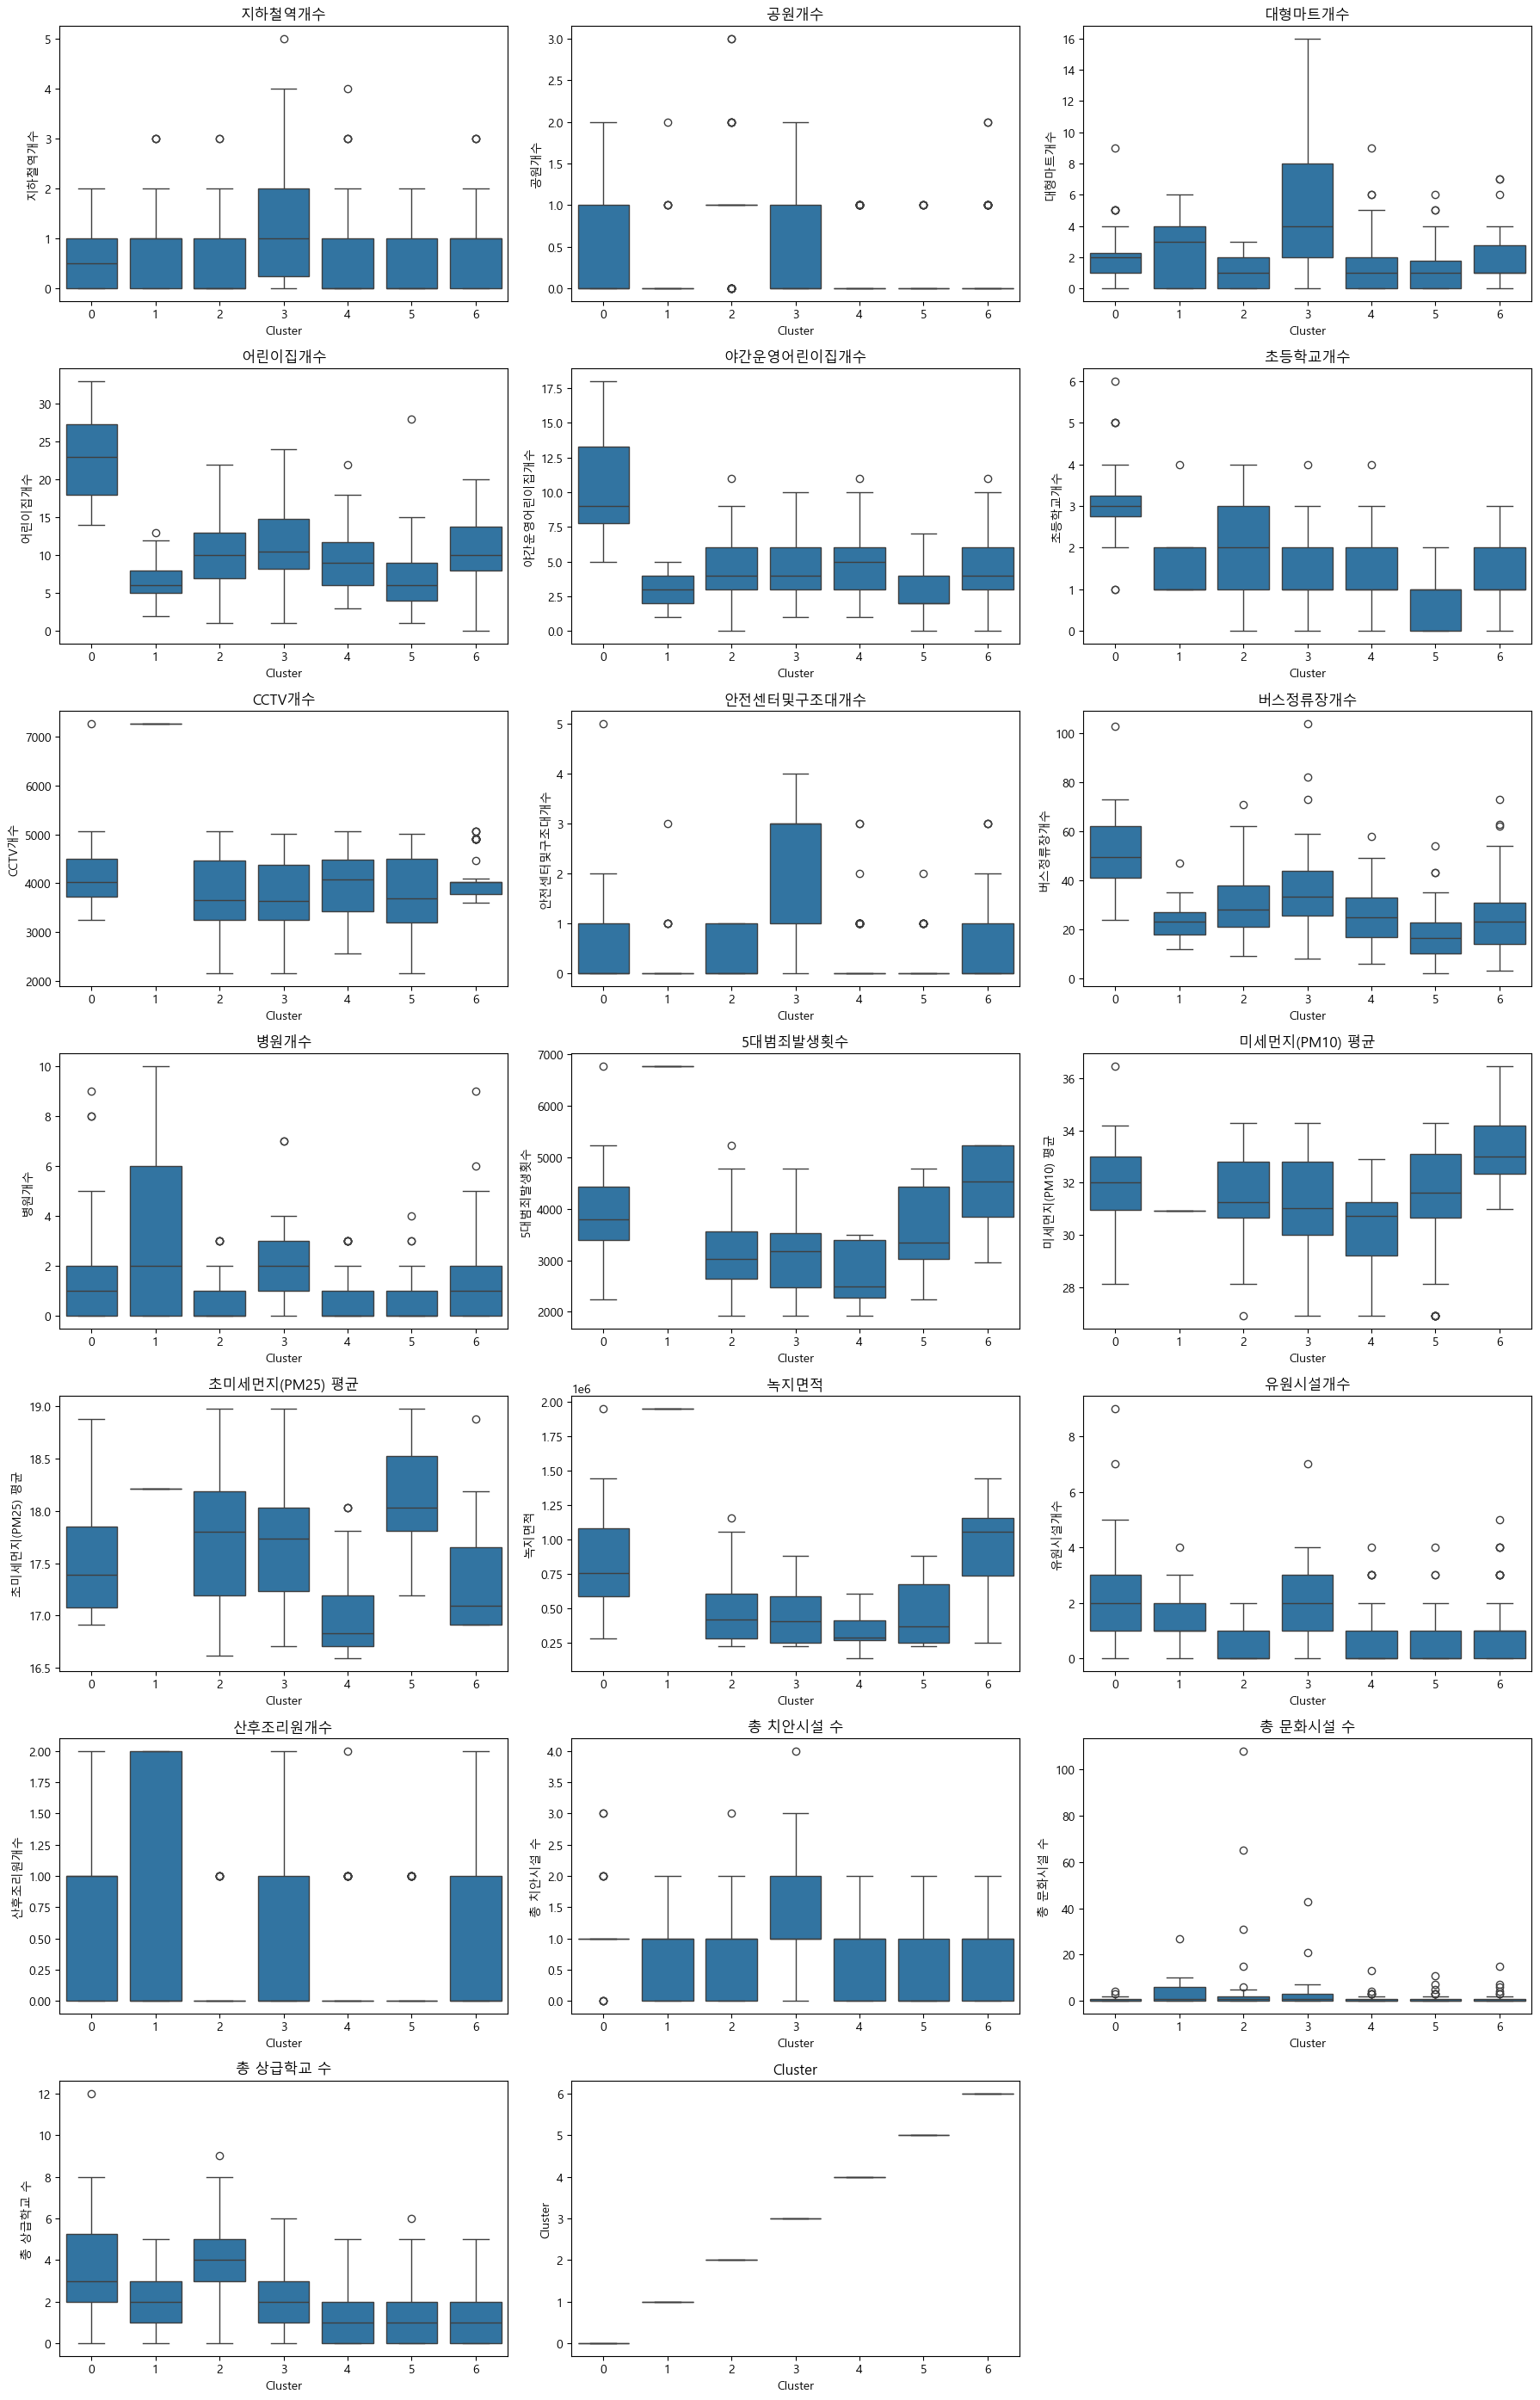

In [78]:
num_features = df_numeric_.shape[1]  # 수치형 변수 개수
cols = 3  # 한 줄에 표시할 그래프 개수
rows = (num_features // cols) + (num_features % cols > 0)  # 필요한 행 개수 계산

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))  # 크기 조정
axes = axes.flatten()  # 1D 배열로 변환

for i, col in enumerate(df_numeric_.columns):
    sns.boxplot(x='Cluster', y=col, data=df, ax=axes[i])  # x축에 'Cluster' 추가
    axes[i].set_title(col)

# 빈 서브플롯 숨기기 (데이터 개수에 맞춰 조정)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 레이아웃 조정
plt.show()

## 클러스터별 특징 요약 (Box Plot 기반)

| 클러스터 | 주요 특징                                                                                                                                                                                                                                                                                                                                                                                                                      |
| :-------: | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|    **0**   | 지하철역 개수 (중간), 공원 개수 (중간), **어린이집 개수 (높음)**, **야간운영 어린이집 개수 (높음)**,  CCTV 개수 (중간), 안전센터 및 구조대 개수 (낮음), 버스 정류장 개수 (중간), 병원 개수 (높음),  5대범죄발생횟수 (중간), 미세먼지 (PM10) 평균 (중간),  초미세먼지 (PM2.5) 평균 (중간), 녹지 면적 (높음), 유원시설 개수 (중간), 산후조리원 개수 (중간), 총 치안 시설 수 (낮음), 총 문화 시설 수 (낮음), 총 상급 학교 수 (중간) |
|    **1**   | 지하철역 개수 (낮음), 공원 개수 (낮음), 어린이집 개수 (낮음), 야간운영 어린이집 개수 (낮음),  **CCTV 개수 (높음)**, 안전센터 및 구조대 개수 (낮음), 버스 정류장 개수 (낮음), 병원 개수 (낮음),  5대범죄발생횟수 (높음), 미세먼지 (PM10) 평균 (높음),  초미세먼지 (PM2.5) 평균 (높음), 녹지 면적 (낮음), 유원시설 개수 (낮음), 산후조리원 개수 (낮음), 총 치안 시설 수 (낮음), 총 문화 시설 수 (낮음), 총 상급 학교 수 (낮음) |
|    **2**   | **지하철역 개수 (높음)**, 공원 개수 (높음), 어린이집 개수 (낮음), 야간운영 어린이집 개수 (낮음),  CCTV 개수 (낮음), 안전센터 및 구조대 개수 (높음), **버스 정류장 개수 (높음)**, 병원 개수 (낮음),  5대범죄발생횟수 (낮음), **미세먼지 (PM10) 평균 (낮음)**,  **초미세먼지 (PM2.5) 평균 (낮음)**, **녹지 면적 (높음)**, 유원시설 개수 (중간), 산후조리원 개수 (낮음), **총 치안 시설 수 (높음)**, **총 문화 시설 수 (높음)**, 총 상급 학교 수 (중간)  |
|    **3**   | 지하철역 개수 (중간), 공원 개수 (낮음), 어린이집 개수 (낮음), 야간운영 어린이집 개수 (낮음),  CCTV 개수 (중간), 안전센터 및 구조대 개수 (낮음), 버스 정류장 개수 (중간), 병원 개수 (낮음),  5대범죄발생횟수 (낮음), 미세먼지 (PM10) 평균 (낮음),  초미세먼지 (PM2.5) 평균 (낮음), 녹지 면적 (중간), 유원시설 개수 (중간), 산후조리원 개수 (낮음), 총 치안 시설 수 (중간), 총 문화 시설 수 (낮음), 총 상급 학교 수 (중간) |
|    **4**   | 지하철역 개수 (낮음), 공원 개수 (낮음), 어린이집 개수 (중간), 야간운영 어린이집 개수 (낮음),  CCTV 개수 (중간), 안전센터 및 구조대 개수 (낮음), 버스 정류장 개수 (중간), 병원 개수 (낮음),  5대범죄발생횟수 (중간), 미세먼지 (PM10) 평균 (높음),  초미세먼지 (PM2.5) 평균 (높음), 녹지 면적 (중간), 유원시설 개수 (낮음), 산후조리원 개수 (낮음), 총 치안 시설 수 (낮음), 총 문화 시설 수 (낮음), 총 상급 학교 수 (중간)  |
|    **5**   | 지하철역 개수 (낮음), 공원 개수 (낮음), 어린이집 개수 (중간), 야간운영 어린이집 개수 (중간),  CCTV 개수 (중간), 안전센터 및 구조대 개수 (낮음), 버스 정류장 개수 (낮음), 병원 개수 (낮음),  5대범죄발생횟수 (낮음), 미세먼지 (PM10) 평균 (중간),  초미세먼지 (PM2.5) 평균 (중간), 녹지 면적 (낮음), 유원시설 개수 (낮음), 산후조리원 개수 (낮음), 총 치안 시설 수 (낮음), 총 문화 시설 수 (낮음), 총 상급 학교 수 (중간) |
|    **6**   | 지하철역 개수 (중간), 공원 개수 (중간), **어린이집 개수 (높음)**, 야간운영 어린이집 개수 (중간),  **CCTV 개수 (높음)**, 안전센터 및 구조대 개수 (중간), 버스 정류장 개수 (중간), 병원 개수 (높음),  5대범죄발생횟수 (중간), 미세먼지 (PM10) 평균 (중간),  초미세먼지 (PM2.5) 평균 (중간), 녹지 면적 (중간), **유원시설 개수 (높음)**, **산후조리원 개수 (높음)**, **총 치안 시설 수 (높음)**, **총 문화 시설 수 (높음)**, **총 상급 학교 수 (높음)**  |


## PCA

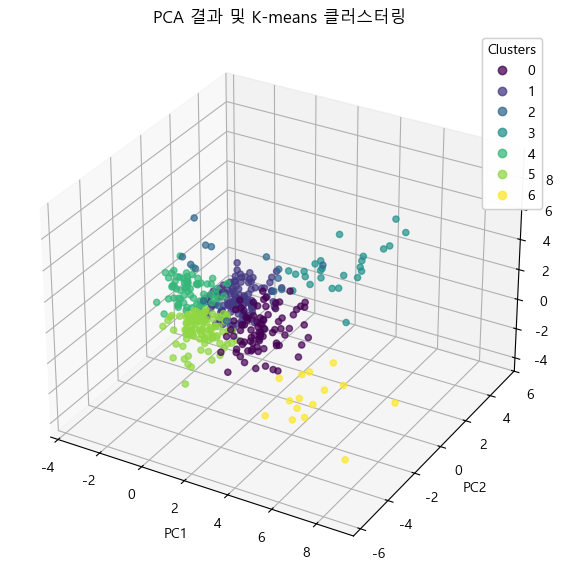

PCA 설명력: [0.18051986 0.13713454 0.10629281]
누적 설명력: 0.423947209565657


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 파일 로드
df = pd.read_csv('최종데이터셋_합산.csv')

# 제외할 컬럼 제거
exclude_cols = ['구', '읍면동명', '행정기관코드', '아동비율','14세미만아동','인구수', '주택전세가격', '2021~2023혼인', '20~40남자수', '20~40여자수']
df_numeric = df.drop(columns=exclude_cols, errors='ignore')

# NaN 값 제거 (필요에 따라 다른 방법 적용 가능)
df_numeric = df_numeric.dropna()

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA 적용 (3개의 주성분)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# PCA 결과를 DataFrame으로 변환
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# K-means clustering (군집 개수는 3으로 설정, 필요시 조정 가능)
kmeans = KMeans(n_clusters=7, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 결과 및 K-means 클러스터링')
plt.show()

# PCA 설명력 확인
explained_variance = pca.explained_variance_ratio_
print(f'PCA 설명력: {explained_variance}')
print(f'누적 설명력: {np.sum(explained_variance)}')


In [80]:
from sklearn.preprocessing import StandardScaler
# 파일 로드
df = pd.read_csv('최종데이터셋_합산.csv')

# 제외할 컬럼 제거
exclude_cols = ['구', '읍면동명', '행정기관코드', '아동비율','14세미만아동','인구수', '주택전세가격', '2021~2023혼인', '20~40남자수', '20~40여자수']
df_numeric = df.drop(columns=exclude_cols, errors='ignore')

# NaN 값 제거 (필요에 따라 다른 방법 적용 가능)
df_numeric = df_numeric.dropna()

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA 적용 (3개의 주성분)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# PCA 결과를 DataFrame으로 변환
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# K-means clustering (군집 개수는 3으로 설정, 필요시 조정 가능)
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# 클러스터별 주성분 평균값 계산
cluster_means = df_pca.groupby('Cluster')[['PC1', 'PC2', 'PC3']].mean()
print(cluster_means)


              PC1       PC2       PC3
Cluster                              
0        1.583299 -0.432449 -0.219250
1       -0.615147  1.116840 -0.333037
2        1.265703 -1.797284  4.561492
3        2.435527  3.972026  0.819005
4       -2.005561 -0.182745  0.782584
5       -0.776683 -1.243511 -0.524206
6        4.969306 -1.985442 -2.096870


클러스터별 주성분(PC1, PC2, PC3)의 평균값을 계산하여 각 클러스터의 특징을 파악할 수 있긴 함.


PCA 로딩 행렬 (각 변수의 주성분 기여도):
                     PC1       PC2       PC3
지하철역개수          0.158049 -0.015620  0.380418
공원개수            0.158323 -0.179449  0.075165
대형마트개수          0.182700 -0.066400  0.371878
어린이집개수          0.343666 -0.211172 -0.290587
야간운영어린이집개수      0.274542 -0.239932 -0.349983
초등학교개수          0.296046 -0.160977 -0.260165
CCTV개수          0.218932  0.390017 -0.133151
안전센터및구조대개수      0.199527 -0.149965  0.216094
버스정류장개수         0.329687 -0.249679 -0.011053
병원개수            0.270271  0.113666  0.213176
5대범죄발생횟수        0.248271  0.491373 -0.002290
미세먼지(PM10) 평균   0.122557  0.225897 -0.169585
초미세먼지(PM25) 평균  0.041163  0.170128  0.208570
녹지면적            0.277923  0.448471 -0.047537
유원시설개수          0.274036 -0.075358  0.129947
산후조리원개수         0.237879  0.092050  0.081934
총 치안시설 수        0.193770 -0.194500  0.263756
총 문화시설 수        0.049726 -0.058786  0.361452
총 상급학교 수        0.196658 -0.084995 -0.168502


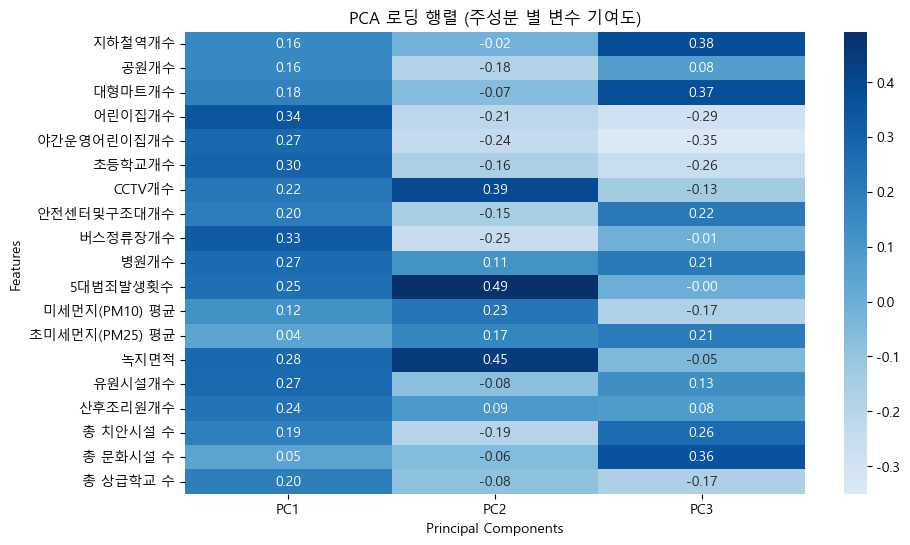

In [81]:
# PCA 로딩 행렬 확인 (주성분 별 변수 영향력 분석)
loading_matrix = pd.DataFrame(pca.components_.T, index=df_numeric.columns, columns=['PC1', 'PC2', 'PC3'])
print("\nPCA 로딩 행렬 (각 변수의 주성분 기여도):")
print(loading_matrix)

# 로딩 행렬 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(loading_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('PCA 로딩 행렬 (주성분 별 변수 기여도)')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

In [82]:
df = pd.read_csv("최종데이터셋_합산.csv")

def normalize(series):
    return series / series.max()

def category_score(df, columns, weights, reverse_columns=None):
    total_score = 0
    for column, weight in zip(columns, weights):
        normalized_series = normalize(df[column])
        if reverse_columns and column in reverse_columns:
            normalized_series = 1 - normalized_series  # 값이 클수록 안 좋으면 1에서 뺌
        total_score += normalized_series * weight
    return total_score  

categories = {
    "교통": {"columns": ["버스정류장개수", "지하철역개수"],
           "weights": [50, 50]},
    "교육": {"columns": ["총 상급학교 수", "초등학교개수"],
           "weights": [40, 60]},
    "생활": {"columns": ["대형마트개수", "병원개수"],
           "weights": [50, 50]},
    "문화": {"columns": ["총 문화시설 수", "공원개수"],
           "weights": [60, 40]},
    "안전": {"columns": ["5대범죄발생횟수", "CCTV개수", "총 치안시설 수", "안전센터및구조대개수"], 
           "weights": [20, 20, 40, 20],
        "reverse_columns": ["5대범죄발생횟수"]},
    "자연": {"columns": ["미세먼지(PM10) 평균", "초미세먼지(PM25) 평균", "녹지면적"],
           "weights": [40, 40, 20],
           "reverse_columns": ["미세먼지(PM10) 평균", "초미세먼지(PM25) 평균"]},
    "육아": {"columns": ["산후조리원개수", "유원시설개수", "어린이집개수", "야간운영어린이집개수"],
           "weights": [10, 20, 40, 30]},
}

category_scores = {}
for category, details in categories.items():
    columns = details["columns"]
    weights = details["weights"]
    reverse_columns = details.get("reverse_columns")  # reverse_columns가 정의되어 있지 않으면 None 반환
    category_scores[category] = category_score(
        df, columns, weights, reverse_columns
    )
    df[category] = category_scores[category]
    df[f"{category} 순위"] = df[category].rank(ascending=False, method='dense')

df.to_csv("최종데이터셋_순위.csv", encoding="utf-8-sig", index=False)
    


In [83]:
file_path = "최종데이터셋_순위.csv"
df = pd.read_csv(file_path)

# 행정기관코드 제거
df_filtered = df.drop(columns=["행정기관코드"])

def categorize_column(column):
    unique_vals = df_filtered[column].nunique()
    
    if unique_vals == 2:  # 0과 1로만 이루어진 경우 없음/있음 변환
        return df_filtered[column].replace({0: "없음", 1: "있음"})
    elif unique_vals > 3:  # 연속형 데이터에 대해 최상, 상, 중, 하 변환
        quantiles = df_filtered[column].quantile([0.25, 0.5, 0.75]).values
        quantiles = np.unique(quantiles)  # 중복된 경계값 방지
        bins = np.concatenate(([-float("inf")], quantiles, [float("inf")]))  # 경계값 설정
        labels = ['하', '중', '상', '최상']
        return pd.cut(df_filtered[column], bins=bins, labels=labels[:len(bins)-1])
    else:  # 값이 3개 이하인 경우 원본 유지
        return df_filtered[column]

# 데이터프레임에 등급 컬럼 추가
categorized_df = df_filtered.copy()
for col in df_filtered.columns:
    if col not in ["구", "읍면동명"]:
        categorized_df[col + "_등급"] = categorize_column(col)

# 5대범죄발생횟수는 값이 낮을수록 "최상", 높을수록 "하"가 되도록 조정
crime_column = "5대범죄발생횟수"
crime_quantiles = df_filtered[crime_column].quantile([0.25, 0.5, 0.75]).values
crime_quantiles = np.unique(crime_quantiles)  # 중복 방지
crime_bins = np.concatenate(([-float("inf")], crime_quantiles, [float("inf")]))
categorized_df[crime_column + "_등급"] = pd.cut(df_filtered[crime_column], bins=crime_bins, labels=['최상', '상', '중', '하'])

envir1_column = "미세먼지(PM10) 평균"
envir1_quantiles = df_filtered[envir1_column].quantile([0.25, 0.5, 0.75]).values
envir1_quantiles = np.unique(envir1_quantiles)  # 중복 방지
envir1_bins = np.concatenate(([-float("inf")], envir1_quantiles, [float("inf")]))
categorized_df[envir1_column + "_등급"] = pd.cut(df_filtered[envir1_column], bins=envir1_bins, labels=['최상', '상', '중', '하'])

envir2_column = "초미세먼지(PM25) 평균"
envir2_quantiles = df_filtered[envir2_column].quantile([0.25, 0.5, 0.75]).values
envir2_quantiles = np.unique(envir2_quantiles)  # 중복 방지
envir2_bins = np.concatenate(([-float("inf")], envir2_quantiles, [float("inf")]))
categorized_df[envir2_column + "_등급"] = pd.cut(df_filtered[envir2_column], bins=envir2_bins, labels=['최상', '상', '중', '하'])

'''
#*0과 1로 이루어진 컬럼을 0이면 없음, 1 이상이면 있음으로 변환
binary_columns = [col for col in df_filtered.columns if df_filtered[col].nunique() == 2]
for col in binary_columns:
    categorized_df[col] = df_filtered[col].apply(lambda x: "없음" if x == 0 else "있음")
'''

# "치안시설_있음없음"과 "산후조리원_있음없음" 추가 (0이면 없음, 1 이상이면 있음)
categorized_df["치안시설_유무"] = df_filtered[["총 치안시설 수"]].sum(axis=1).apply(lambda x: "없음" if x == 0 else "있음")
categorized_df["산후조리원_유무"] = df_filtered["산후조리원개수"].apply(lambda x: "없음" if x == 0 else "있음")

# 불필요한 기존 등급 컬럼 제거
categorized_df = categorized_df.drop(columns=["총 치안시설 수_등급", "산후조리원개수_등급"])

categorized_df.to_csv('최종데이터셋_등급.csv', index=False, encoding="utf-8-sig")

In [84]:
df = pd.read_csv("최종데이터셋_등급.csv")

def normalize(series):
    return series / series.max()

def category_score(df, columns, weights, reverse_columns=None):
    total_score = 0
    for column, weight in zip(columns, weights):
        normalized_series = normalize(df[column])
        if reverse_columns and column in reverse_columns:
            normalized_series = 1 - normalized_series
        total_score += normalized_series * weight
    return total_score

categories = {
    "교통": {"columns": ["버스정류장개수", "지하철역개수"],
           "weights": [50, 50]},
    "교육": {"columns": ["총 상급학교 수", "초등학교개수"],
           "weights": [40, 60]},
    "생활": {"columns": ["대형마트개수", "병원개수"],
           "weights": [50, 50]},
    "문화": {"columns": ["총 문화시설 수", "공원개수"],
           "weights": [60, 40]},
    "안전": {"columns": ["5대범죄발생횟수", "CCTV개수", "총 치안시설 수", "안전센터및구조대개수"], 
           "weights": [20, 20, 40, 20],
        "reverse_columns": ["5대범죄발생횟수"]},
    "자연": {"columns": ["미세먼지(PM10) 평균", "초미세먼지(PM25) 평균", "녹지면적"],
           "weights": [40, 40, 20],
           "reverse_columns": ["미세먼지(PM10) 평균", "초미세먼지(PM25) 평균"]},
    "육아": {"columns": ["산후조리원개수", "유원시설개수", "어린이집개수", "야간운영어린이집개수"],
           "weights": [10, 20, 40, 30]},
}


category_scores = {}
for category, details in categories.items():
    columns = details["columns"]
    weights = details["weights"]
    reverse_columns = details.get("reverse_columns")
    category_scores[category] = category_score(
        df, columns, weights, reverse_columns
    )
    df[category] = category_scores[category]
    df[f"{category} 순위"] = df[category].rank(ascending=False, method='dense')

my_category = "자연"

print(f"\n[ {my_category} ]")
head = df.sort_values(by=f"{my_category} 순위").head(5)
for index, row in head.iterrows():
    print(f"{int(row[f'{my_category} 순위'])}위: {row['읍면동명']} [{row[my_category]:.2f}점]")
    print(f"  - 주택전세가격: {row['주택전세가격']:.2f}")
    print(f"  - 아동비율: {row['아동비율']:.2f}")
    print(f"  - 2021~2023혼인: {row['2021~2023혼인']}")
    
    # 카테고리별 등급 
    for column in categories[my_category]['columns']:
        grade_column = f"{column}_등급"  
        print(f"  - {column}: {row[grade_column]}")

    print('')


[ 자연 ]
1위: 개포4동 [27.70점]
  - 주택전세가격: 91.50
  - 아동비율: 0.11
  - 2021~2023혼인: 271
  - 미세먼지(PM10) 평균: 상
  - 초미세먼지(PM25) 평균: 하
  - 녹지면적: 최상

1위: 개포3동 [27.70점]
  - 주택전세가격: 91.50
  - 아동비율: 0.11
  - 2021~2023혼인: 204
  - 미세먼지(PM10) 평균: 상
  - 초미세먼지(PM25) 평균: 하
  - 녹지면적: 최상

1위: 개포2동 [27.70점]
  - 주택전세가격: 91.50
  - 아동비율: 0.15
  - 2021~2023혼인: 323
  - 미세먼지(PM10) 평균: 상
  - 초미세먼지(PM25) 평균: 하
  - 녹지면적: 최상

1위: 개포1동 [27.70점]
  - 주택전세가격: 91.50
  - 아동비율: 0.17
  - 2021~2023혼인: 58
  - 미세먼지(PM10) 평균: 상
  - 초미세먼지(PM25) 평균: 하
  - 녹지면적: 최상

1위: 수서동 [27.70점]
  - 주택전세가격: 91.50
  - 아동비율: 0.05
  - 2021~2023혼인: 229
  - 미세먼지(PM10) 평균: 상
  - 초미세먼지(PM25) 평균: 하
  - 녹지면적: 최상

